# Backtrack y búsquedas combinatorias

Lo que hace una búsqueda combinatoria es recorrer todo el espacio de estados de un problema algorítmico de una forma ordenada. Una forma muy común de hacer esto es mediante un procedimiento recursivo llamado **backtrack** (en español **vuelta atrás**), que progresivamente va construyendo un vector $A=(v_1,v_2,\ldots,v_k)$ mediante la adición o eliminación en la parte final de elementos de una lista $C$ de candidatos.

Cada que el algoritmo llega a un vector que podría ser una solución válida, lo procesa.

Para ir recorriendo los vectores, se hace lo siguiente:

`backtrack(a,k,datos):
    si a es vacío:
        proceso_inicial(a,k,datos)
    si a es valido:
        procesar(a,k,datos)
    C=generar_candidatos(a,k,datos)
    para j en C:
        agregar j al final de a
        backtrack(a,k,datos)
        eliminar j del final de a
    proceso_final(a,k,datos)`
        
        
Como hay diferentes valores de $C$ en distintos valores de la recursión, estos no interfieren entre sí. A grandes rasgos, lo que va pasando es que estamos haciendo una búsqueda a profundidad en el espacio de estados.

Veamos a continuación algunas implementaciones de este estilo que generan **permutaciones, conjunto potencia, elecciones y subconjuntos de tamaño $k$**.

## Generar permutaciones

In [8]:
## Para generar todas las permutaciones de n elementos y procesarlas

def perms(n,a=[],candidates=[],sols=0):
    if len(a)==0:
        candidates=list(range(n))
    if len(a)==n:
        sols+=1
        print('Entro')
        print(a)
        return(sols)
    for j in candidates:
        a.append(j)
        print('a:', a)
        new_candidates=candidates.copy()
        new_candidates.remove(j)
        print('new_candidate:', new_candidates)
        sols=perms(n,a,new_candidates,sols)   
        print('sols:',sols)
        a.remove(j)
        print('a-remove;', a)
    return sols
    
perms(3)

a: [0]
new_candidate: [1, 2]
a: [0, 1]
new_candidate: [2]
a: [0, 1, 2]
new_candidate: []
Entro
[0, 1, 2]
sols: 1
a-remove; [0, 1]
sols: 1
a-remove; [0]
a: [0, 2]
new_candidate: [1]
a: [0, 2, 1]
new_candidate: []
Entro
[0, 2, 1]
sols: 2
a-remove; [0, 2]
sols: 2
a-remove; [0]
sols: 2
a-remove; []
a: [1]
new_candidate: [0, 2]
a: [1, 0]
new_candidate: [2]
a: [1, 0, 2]
new_candidate: []
Entro
[1, 0, 2]
sols: 3
a-remove; [1, 0]
sols: 3
a-remove; [1]
a: [1, 2]
new_candidate: [0]
a: [1, 2, 0]
new_candidate: []
Entro
[1, 2, 0]
sols: 4
a-remove; [1, 2]
sols: 4
a-remove; [1]
sols: 4
a-remove; []
a: [2]
new_candidate: [0, 1]
a: [2, 0]
new_candidate: [1]
a: [2, 0, 1]
new_candidate: []
Entro
[2, 0, 1]
sols: 5
a-remove; [2, 0]
sols: 5
a-remove; [2]
a: [2, 1]
new_candidate: [0]
a: [2, 1, 0]
new_candidate: []
Entro
[2, 1, 0]
sols: 6
a-remove; [2, 1]
sols: 6
a-remove; [2]
sols: 6
a-remove; []


6

Reto. Utilizar esta idea de backtrack para resolver el problema del reloj que tenemos pendiente.

In [11]:
# Esta es una posible implementación que sólo cuenta
# las soluciones y por default lo hace para el reloj,
# aunque optativamente toma un parámetro n para hacerlo para
# menos casos.

def reloj(n=12,a=[],candidates=[],sols=0):
    if len(a)==0:
        candidates=[1]
    if len(a)==1:
        candidates=list(range(2,n+1))
    if len(a)==2:
        print(a[-1])
    if len(a)>=3:
        if a[-3]+a[-2]+a[-1]==13:
            return sols
        if len(a)==n:
#             print("Good")
            if a[-2]+a[-1]+a[0]==13 or a[-1]+a[0]+a[1]==13:
                return sols
            else:
                return sols+1
    for j in candidates:
        a.append(j)
        new_candidates=candidates.copy()
        new_candidates.remove(j)
        sols=reloj(n,a,new_candidates,sols)
        a.remove(j)
    return sols

print(reloj())

2
3
4
5
6
7
8
9
10
11
12
24424416


Supusimos que la solución comienza con 1, de modo que aún hace falta recuperar las rotaciones de esta solución. En total son $24424416\cdot 12 = 293092992$.

In [13]:
print(reloj(11))

2
3
4
5
6
7
8
9
10
11
1965728


Este ya es un muy buen algoritmo pensando en términos de exploración exhaustiva. Toma aproximadamente 1 minuto en terminar. Hay todavía mejores maneras de resolver el problema, explotando mucho más la estructura de cuándo sucede que en efecto tenemos una suma igual a 13 y dando un argumento combinatorio.

Aquí abajo simplemente hay una implementación que además de guardar las cantidad de soluciones, también guarda las soluciones buenas. La ponemos en 6 por default pues para números más grandes hay que tener cuidado con la memoria.

In [14]:
def reloj_buenos(n=6,a=[],candidates=[],sols=0,buenos=list([])):
    if len(a)==0:
        candidates=[1]
    if len(a)==1:
        candidates=list(range(2,n+1))
    if len(a)==2:
        print(a[-1])
    if len(a)>=3:
        if a[-3]+a[-2]+a[-1]==13:
            return sols,buenos
        if len(a)==n:
            if a[-2]+a[-1]+a[0]==13 or a[-1]+a[0]+a[1]==13:
                return sols,buenos
            else:
                buenos.append(a.copy())
                return sols+1,buenos
    for j in candidates:
        a.append(j)
        new_candidates=candidates.copy()
        new_candidates.remove(j)
        sols,buenos=reloj_buenos(n,a,new_candidates,sols,buenos)
        a.remove(j)
    return sols,buenos

reloj_buenos()

2
3
4
5
6


(56,
 [[1, 2, 3, 4, 5, 6],
  [1, 2, 3, 5, 4, 6],
  [1, 2, 3, 5, 6, 4],
  [1, 2, 3, 6, 5, 4],
  [1, 2, 4, 3, 5, 6],
  [1, 2, 4, 5, 3, 6],
  [1, 2, 4, 5, 6, 3],
  [1, 2, 4, 6, 5, 3],
  [1, 2, 6, 3, 5, 4],
  [1, 2, 6, 4, 5, 3],
  [1, 3, 2, 4, 5, 6],
  [1, 3, 2, 4, 6, 5],
  [1, 3, 2, 5, 4, 6],
  [1, 3, 2, 6, 4, 5],
  [1, 3, 5, 2, 4, 6],
  [1, 3, 5, 4, 2, 6],
  [1, 3, 5, 4, 6, 2],
  [1, 3, 5, 6, 4, 2],
  [1, 3, 6, 2, 4, 5],
  [1, 3, 6, 5, 4, 2],
  [1, 4, 2, 3, 5, 6],
  [1, 4, 2, 3, 6, 5],
  [1, 4, 2, 5, 3, 6],
  [1, 4, 2, 6, 3, 5],
  [1, 4, 5, 2, 3, 6],
  [1, 4, 5, 3, 2, 6],
  [1, 4, 5, 3, 6, 2],
  [1, 4, 5, 6, 3, 2],
  [1, 4, 6, 2, 3, 5],
  [1, 4, 6, 5, 3, 2],
  [1, 5, 3, 2, 4, 6],
  [1, 5, 3, 2, 6, 4],
  [1, 5, 3, 4, 2, 6],
  [1, 5, 3, 6, 2, 4],
  [1, 5, 4, 2, 3, 6],
  [1, 5, 4, 2, 6, 3],
  [1, 5, 4, 3, 2, 6],
  [1, 5, 4, 6, 2, 3],
  [1, 5, 6, 3, 2, 4],
  [1, 5, 6, 4, 2, 3],
  [1, 6, 2, 3, 4, 5],
  [1, 6, 2, 3, 5, 4],
  [1, 6, 2, 4, 3, 5],
  [1, 6, 2, 4, 5, 3],
  [1, 6, 3, 2, 4, 5],
  [1,

## Generar elecciones

In [15]:
## Para generar elecciones de k elementos distintos de
## entre n, en donde sí importa el orden.

def perms_k(n,k,a=[],candidates=[],sols=0):
    if len(a)==0:
        candidates=list(range(1,n+1))
    if len(a)==k:
        sols+=1
        print(a)
        return(sols)
    for j in candidates:
        a.append(j)
        new_candidates=candidates.copy()
        new_candidates.remove(j)
        sols=perms_k(n,k,a,new_candidates,sols)
        a.remove(j)
    return sols
    
perms_k(5,3)

[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 3, 2]
[1, 3, 4]
[1, 3, 5]
[1, 4, 2]
[1, 4, 3]
[1, 4, 5]
[1, 5, 2]
[1, 5, 3]
[1, 5, 4]
[2, 1, 3]
[2, 1, 4]
[2, 1, 5]
[2, 3, 1]
[2, 3, 4]
[2, 3, 5]
[2, 4, 1]
[2, 4, 3]
[2, 4, 5]
[2, 5, 1]
[2, 5, 3]
[2, 5, 4]
[3, 1, 2]
[3, 1, 4]
[3, 1, 5]
[3, 2, 1]
[3, 2, 4]
[3, 2, 5]
[3, 4, 1]
[3, 4, 2]
[3, 4, 5]
[3, 5, 1]
[3, 5, 2]
[3, 5, 4]
[4, 1, 2]
[4, 1, 3]
[4, 1, 5]
[4, 2, 1]
[4, 2, 3]
[4, 2, 5]
[4, 3, 1]
[4, 3, 2]
[4, 3, 5]
[4, 5, 1]
[4, 5, 2]
[4, 5, 3]
[5, 1, 2]
[5, 1, 3]
[5, 1, 4]
[5, 2, 1]
[5, 2, 3]
[5, 2, 4]
[5, 3, 1]
[5, 3, 2]
[5, 3, 4]
[5, 4, 1]
[5, 4, 2]
[5, 4, 3]


60

## Generar conjunto potencia

In [43]:
## Para generar los subconjuntos de n elementos y procesarlos

def subsets(n,a=[],sols=0):
    print(a)
    sols+=1
    if len(a)==0:
        first=0
    else:
        first=max(a)+1
    candidates=list(range(first,n))
    for j in candidates:
        a.append(j)
        sols=subsets(n,a,sols)
        a.remove(j)
    return sols
    
subsets(6)

[]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 5]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 5]
[0, 1, 3]
[0, 1, 3, 4]
[0, 1, 3, 4, 5]
[0, 1, 3, 5]
[0, 1, 4]
[0, 1, 4, 5]
[0, 1, 5]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]
[0, 2, 3, 4, 5]
[0, 2, 3, 5]
[0, 2, 4]
[0, 2, 4, 5]
[0, 2, 5]
[0, 3]
[0, 3, 4]
[0, 3, 4, 5]
[0, 3, 5]
[0, 4]
[0, 4, 5]
[0, 5]
[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 5]
[1, 2, 4]
[1, 2, 4, 5]
[1, 2, 5]
[1, 3]
[1, 3, 4]
[1, 3, 4, 5]
[1, 3, 5]
[1, 4]
[1, 4, 5]
[1, 5]
[2]
[2, 3]
[2, 3, 4]
[2, 3, 4, 5]
[2, 3, 5]
[2, 4]
[2, 4, 5]
[2, 5]
[3]
[3, 4]
[3, 4, 5]
[3, 5]
[4]
[4, 5]
[5]


64

## Generar subconjuntos de tamaño $k$



In [44]:
## Hagamos el procesamiento de soluciones un poco más interesante mediante
## una forma más visual de mostrar los subconjuntos de cierto tamaño.
def display_subset(n,S):
    pic=n*["_"]
    for j in S:
        pic[j]="O"
    pic=str(S)+': '+''.join(pic)
    print(pic)

def subsets_k(n,k,a=[],sols=0):
    if len(a)==k:
        display_subset(n,a)
        sols+=1
    if len(a)==0:
        first=0
    else:
        first=max(a)+1
    candidates=list(range(first,n))
    for j in candidates:
        a.append(j)
        sols=subsets_k(n,k,a,sols)
        a.remove(j)
    return sols
    
subsets_k(7,3)

[0, 1, 2]: OOO____
[0, 1, 3]: OO_O___
[0, 1, 4]: OO__O__
[0, 1, 5]: OO___O_
[0, 1, 6]: OO____O
[0, 2, 3]: O_OO___
[0, 2, 4]: O_O_O__
[0, 2, 5]: O_O__O_
[0, 2, 6]: O_O___O
[0, 3, 4]: O__OO__
[0, 3, 5]: O__O_O_
[0, 3, 6]: O__O__O
[0, 4, 5]: O___OO_
[0, 4, 6]: O___O_O
[0, 5, 6]: O____OO
[1, 2, 3]: _OOO___
[1, 2, 4]: _OO_O__
[1, 2, 5]: _OO__O_
[1, 2, 6]: _OO___O
[1, 3, 4]: _O_OO__
[1, 3, 5]: _O_O_O_
[1, 3, 6]: _O_O__O
[1, 4, 5]: _O__OO_
[1, 4, 6]: _O__O_O
[1, 5, 6]: _O___OO
[2, 3, 4]: __OOO__
[2, 3, 5]: __OO_O_
[2, 3, 6]: __OO__O
[2, 4, 5]: __O_OO_
[2, 4, 6]: __O_O_O
[2, 5, 6]: __O__OO
[3, 4, 5]: ___OOO_
[3, 4, 6]: ___OO_O
[3, 5, 6]: ___O_OO
[4, 5, 6]: ____OOO


35

## Generar caminos en una gráfica

Encontrar todos los caminos de $u$ a $v$ en una gráfica. Ahora los potenciales candidatos son vértices que no hayan sido visitados con anterioridad. Sí nos importa el orden.

In [9]:
import networkx as nx

G=nx.petersen_graph()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


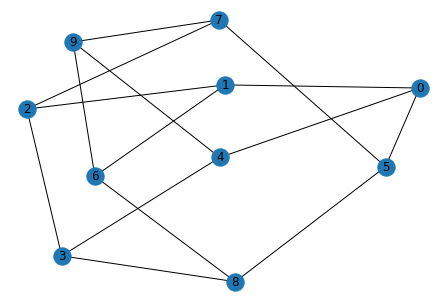

In [10]:
print(nx.nodes(G))
print(nx.edges(G))
nx.draw(G,with_labels=True)

¿Cuántos caminos hay de $0$ a $6$? Los hacemos mediante backtrack.

[0, 1, 2, 3, 4, 9, 6]
[0, 1, 2, 3, 4, 9, 7, 5, 8, 6]
[0, 1, 2, 3, 8, 5, 7, 9, 6]
[0, 1, 2, 3, 8, 6]
[0, 1, 2, 7, 5, 8, 3, 4, 9, 6]
[0, 1, 2, 7, 5, 8, 6]
[0, 1, 2, 7, 9, 4, 3, 8, 6]
[0, 1, 2, 7, 9, 6]
[0, 1, 6]
[0, 4, 3, 2, 1, 6]
[0, 4, 3, 2, 7, 5, 8, 6]
[0, 4, 3, 2, 7, 9, 6]
[0, 4, 3, 8, 5, 7, 2, 1, 6]
[0, 4, 3, 8, 5, 7, 9, 6]
[0, 4, 3, 8, 6]
[0, 4, 9, 6]
[0, 4, 9, 7, 2, 1, 6]
[0, 4, 9, 7, 2, 3, 8, 6]
[0, 4, 9, 7, 5, 8, 3, 2, 1, 6]
[0, 4, 9, 7, 5, 8, 6]
[0, 5, 7, 2, 1, 6]
[0, 5, 7, 2, 3, 4, 9, 6]
[0, 5, 7, 2, 3, 8, 6]
[0, 5, 7, 9, 4, 3, 2, 1, 6]
[0, 5, 7, 9, 4, 3, 8, 6]
[0, 5, 7, 9, 6]
[0, 5, 8, 3, 2, 1, 6]
[0, 5, 8, 3, 2, 7, 9, 6]
[0, 5, 8, 3, 4, 9, 6]
[0, 5, 8, 3, 4, 9, 7, 2, 1, 6]
[0, 5, 8, 6]


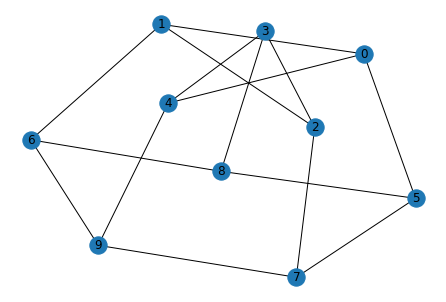

In [7]:
def paths(G,u,v,a=[],sols=[]):
    if len(a)==0:
        a.append(u)
    if a[-1]==v:
        sols+=[a.copy()]
        return sols
    candidates=[]
    # Aquí abajo hay algo cuadrático sucediendo que se puede mejorar pasando candidates en la recursión
    for j in nx.all_neighbors(G,a[-1]):
        if j not in a:
            candidates.append(j)
    for j in candidates:
        a.append(j)
        sols=paths(G,u,v,a,sols)
        a.remove(j)
    return sols

pathsuv=paths(G,0,6)
# pathsuv.sort(key=lambda x:len(x))
for path in pathsuv:
    print(path)
    
nx.draw(G,with_labels=True)

## Generar coloraciones de gráficas

También podemos hacer backtrack para encontrar coloraciones con cierto número de colores para una gráfica, si es que existen. Vamos avanzando en llenar un vector $(c_1,\ldots,c_k)$ con los colores correspondientes a los vértices $v_1,\ldots,v_k$.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


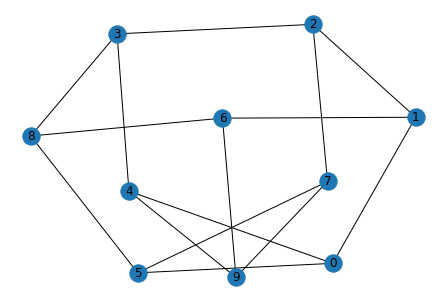

In [70]:
import matplotlib.pyplot as plt
G=nx.petersen_graph()
print(nx.nodes(G))
print(nx.edges(G))
nx.draw_kamada_kawai(G,with_labels=True)

120


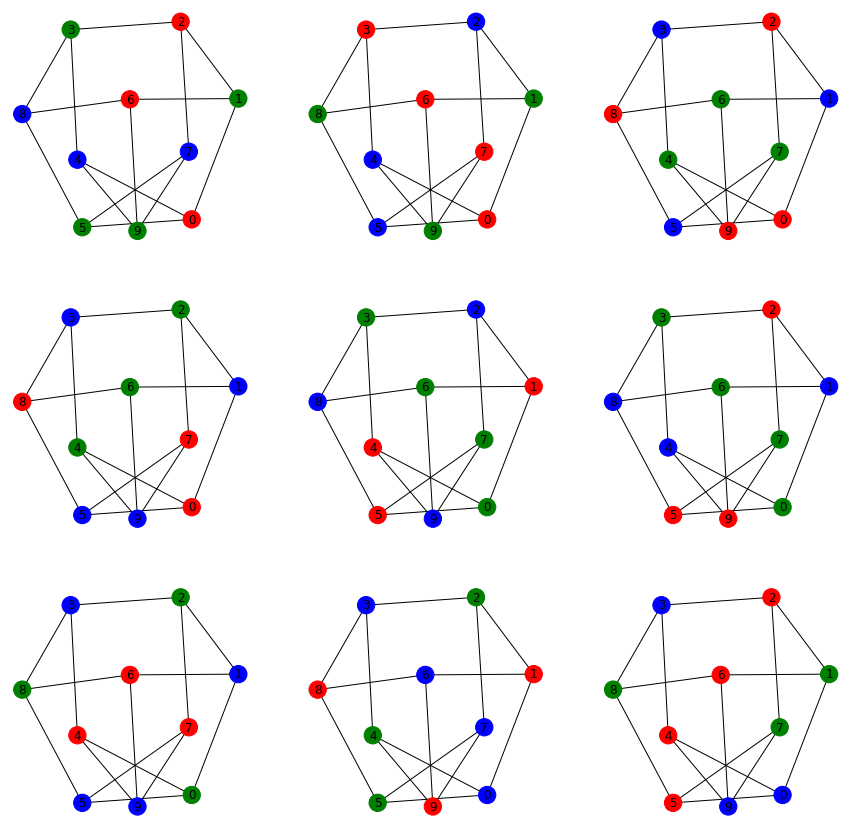

In [93]:
def three_col(G,n,a=[],sols=[]):
    k=len(a)
    if k==n:
        sols.append(a.copy())
        return(sols)
    candidates=[0,1,2]
    for j in nx.all_neighbors(G,k):
        if j<k and (a[j] in candidates):
            candidates.remove(a[j])
    for j in candidates:
        a.append(j)
        sols=three_col(G,n,a,sols)
        a.pop()
    return(sols)

proper=three_col(G,10)
colors=['red','green','blue']

fig, axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)
print(len(proper))
for k in range(9):
    one_proper=[colors[j] for j in proper[13*k]]
    nx.draw_kamada_kawai(G,node_color=one_proper,with_labels=True,ax=axs[int(k/3),k%3])

Intentemos ver el backtrack en acción

In [98]:
def three_col_accion(G,n,a=[],track=[]):
    k=len(a)
    track.append(a.copy())
    if k==n:
        return track
    candidates=[0,1,2]
    for j in list(nx.all_neighbors(G,k)):
        if j<=k and (a[j] in candidates):
            candidates.remove(a[j])
    for j in candidates:
        a.append(j)
        track=three_col_accion(G,n,a)
        a.pop()
    return track

proper=three_col_accion(G,10)

In [103]:
# Primer forma de dibujarlo
for k in proper:
    while len(k)<10:
        k.append(3)
print(len(proper))
colors=['red','green','blue','black']
j=0
plt.figure(figsize=(7,7))
for coloring in proper:
    nx.draw_kamada_kawai(G,node_color=[colors[k] for k in coloring],with_labels=True,node_size=1800,font_size=36)
    plt.savefig('backtrack/{:0>3}.png'.format(j))
    plt.clf()
    j+=1

658


<Figure size 504x504 with 0 Axes>

658


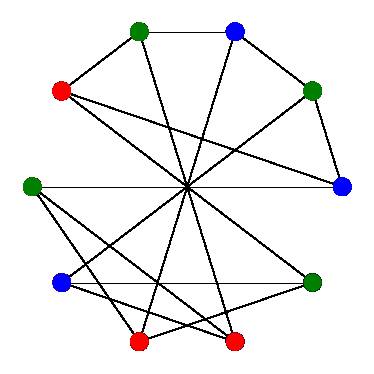

In [89]:
# Segunda forma de dibujarlo
for k in proper:
    while len(k)<10:
        k.append(3)
print(len(proper))
colors=['red','green','blue','black']
j=0
plt.figure(figsize=(5,5))
for coloring in proper:
    nx.draw_circular(G,node_color=[colors[k] for k in coloring])
    plt.savefig('backtrack/c{:0>3}.png'.format(j),with_labels=True)
    plt.clf()
    j+=1